### Simple test of SQP method with nonlinear inequality constraints

Minimize a linear function $c_1x_1 + c_2x_2$ subject to $x_1^2 +x_2^2 \leq 1$, $(x_1 - 1)^2 + x_2^2 \leq 1$, and $x_1^2 + (x_2 - 1)^2 \leq 1$. Solve for a parametrized set of linear functions $(c_1,c_2)=(\cos\theta,\sin\theta)$. The set of possible solutions should be the boundary of the feasible set. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dampnewt

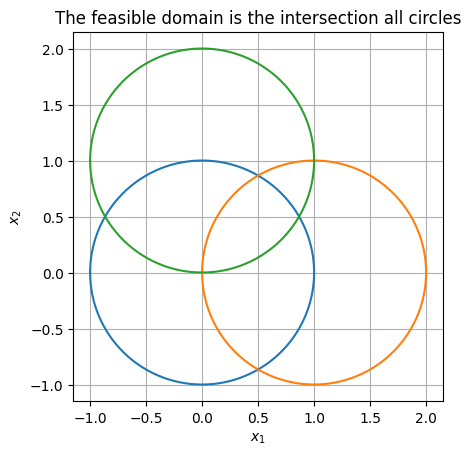

In [2]:
npts = int(250)
theta = np.linspace(-np.pi, np.pi, npts)
plt.plot(np.cos(theta), np.sin(theta))
plt.plot(1.0 + np.cos(theta), np.sin(theta))
plt.plot(np.cos(theta), 1.0 + np.sin(theta))
plt.gca().set_aspect(1.0)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('The feasible domain is the intersection all circles')
plt.grid(True)
plt.show()

In [3]:
def Fobj(x, c):
    return np.sum(c * x), c, np.zeros((2, 2))

def Fineq(x):
    g1 = x[0] ** 2 + x[1] ** 2 - 1.0
    r1 = np.array([2.0 * x[0], 2.0 * x[1]])
    
    g2 = (x[0] - 1.0) ** 2 + x[1] ** 2 - 1.0
    r2 = np.array([2.0 * (x[0] - 1.0), 2.0 * x[1]])
    
    g3 = x[0] ** 2 + (x[1] - 1.0) ** 2 - 1.0
    r3 = np.array([2.0 * x[0], 2.0 * (x[1] - 1.0)])
    return np.array([g1, g2, g3]), np.array([r1, r2, r3])

def solveForC(c):
    def local_obj(x):
        return Fobj(x, c)
    rep = dampnewt.solve(local_obj, FG = Fineq, x0 = np.array([0.50, 0.50]), verbosity = 0, useEye = True, lmbda0 = 1.0)
    assert rep['converged']
    return rep['x']

# Generate a solution for each linear cost gradient

nfailed = 0
m = theta.size
X = np.tile(np.nan, (m, 2))
for k in range(m):
    thetak = theta[k]
    ck = np.array([np.cos(thetak), np.sin(thetak)])
    try:
        pk = solveForC(ck)
        X[k, :] = pk
    except:
        nfailed += 1
        
    if k % 50 == 0:
        print(k)

print('nfailed = {}'.format(nfailed))


0
50
100
150
200
nfailed = 2


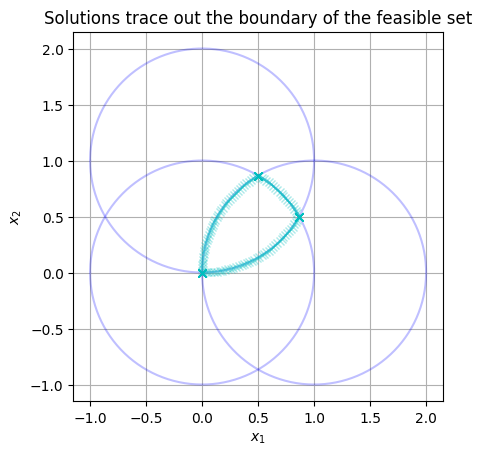

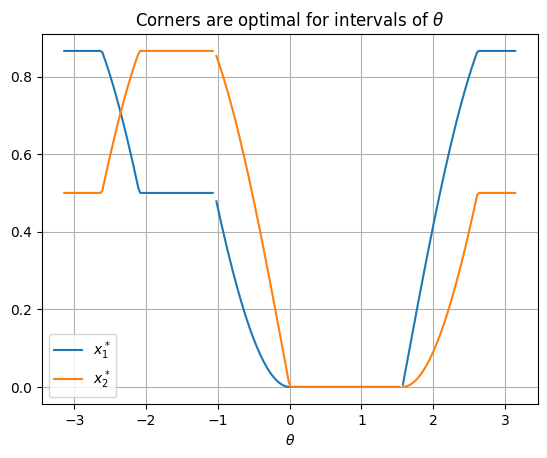

In [4]:
plt.plot(np.cos(theta), np.sin(theta), c = 'b', alpha = 0.25)
plt.plot(1.0 + np.cos(theta), np.sin(theta), c = 'b', alpha = 0.25)
plt.plot(np.cos(theta), 1.0 + np.sin(theta), c = 'b', alpha = 0.25)
plt.plot(X[:, 0], X[:, 1], marker = 'x', alpha = 0.33, c = 'c')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.gca().set_aspect(1.0)
plt.title('Solutions trace out the boundary of the feasible set')
plt.grid(True)
plt.show()

plt.plot(theta, X[:, 0], label = '$x_1^*$')
plt.plot(theta, X[:, 1], label = '$x_2^*$')
plt.xlabel('$\\theta$')
plt.legend()
plt.grid(True)
plt.title('Corners are optimal for intervals of $\\theta$')
plt.show()